In [51]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy

In [52]:
root_dir='/Users/robinruhm/Documents/Research/Fire Hydrology/SlaterFireHydrology';
data_dir=root_dir+'/data';
processed_dir =data_dir+'/Processed';
raw_dir=data_dir+'/Raw';
precip_station='salmonriver'
river='IndianCreek'

In [53]:
data_file=processed_dir+'/IndianCreekFlowData.txt'

In [83]:
rivers = ['IndianCreek']
fire_year = {'IndianCreek': 2020}

In [84]:
df = pd.read_csv(data_file)



In [93]:
decrease_df

,Unnamed: 0,discharge_IndianCreek,discharge_IndianCreek_daily_change,year,month,day,decay_coef_IndianCreek,discharge_IndianCreek_previous_day,discharge_IndianCreek_daily_change_positive,post-fire_river,post-fire_IndianCreek
183,183,141.0,-13.0,2012,7,2,0.915584,154.0,13.0,False,False
184,184,135.0,-6.0,2012,7,3,0.957447,141.0,6.0,False,False
185,185,130.0,-5.0,2012,7,4,0.962963,135.0,5.0,False,False
186,186,126.0,-4.0,2012,7,5,0.969231,130.0,4.0,False,False
187,187,122.0,-4.0,2012,7,6,0.968254,126.0,4.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
3975,3975,89.2,-2.4,2022,11,19,0.973799,91.6,2.4,True,True
3976,3976,86.2,-3.0,2022,11,20,0.966368,89.2,3.0,True,True
3977,3977,84.5,-1.7,2022,11,21,0.980278,86.2,1.7,True,True
3983,3983,107.0,-4.0,2022,11,27,0.963964,111.0,4.0,True,True


In [88]:
for river in rivers:
    df['decay_coef_' + river] = df['discharge_'+river]/(df['discharge_'+river] - df['discharge_'+ river + '_daily_change'])
    df['discharge_' + river + '_previous_day'] = (df['discharge_' + river] - df['discharge_' + river + '_daily_change'])
    df['discharge_' + river + '_daily_change_positive'] = -df['discharge_' + river + '_daily_change']
    df['post-fire_' + river] = df['year'] > fire_year[river]

summer_df = df[(df['month']>6) & (df['month']<12)]


River = IndianCreek; post-fire = False; mean decay coef = 0.9478737097077644 +/- 9.610595335738776e-05
River = IndianCreek; post-fire = True; mean decay coef = 0.9643189215039567 +/- 0.00024731274020289374


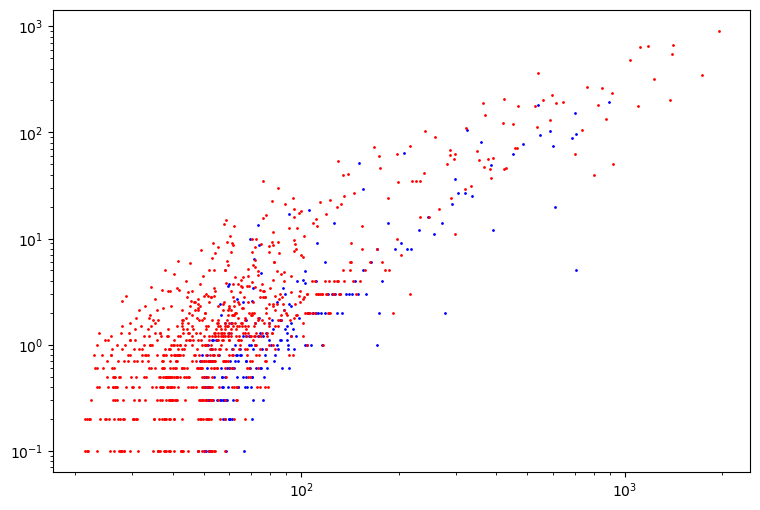

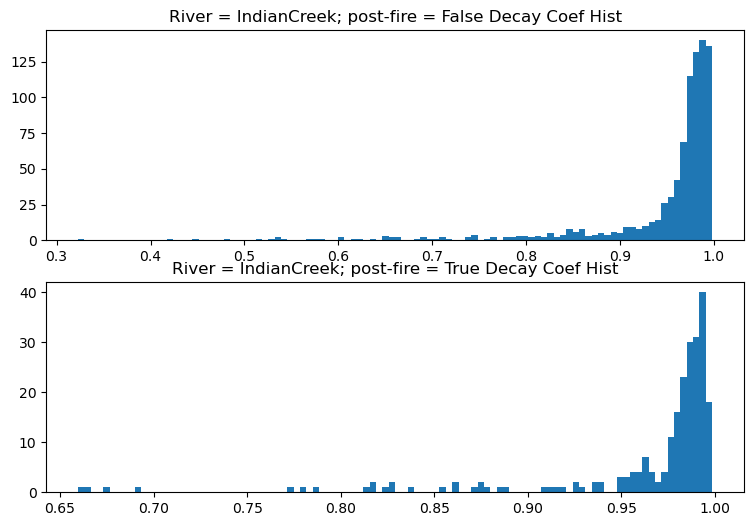

In [102]:
for river in rivers:
    decrease_df = summer_df[summer_df['discharge_' + river + '_daily_change'] < 0]

    decrease_df= decrease_df.drop(decrease_df[decrease_df['year']==2020].index)

    fig, ax = plt.subplots(figsize = (9, 6))
    for (v, c) in [(1, 'b'), (0, 'r')]:
        ax.scatter(decrease_df[decrease_df['post-fire_' + river] == v]['discharge_IndianCreek_previous_day'], decrease_df[decrease_df['post-fire_' + river] == v]['discharge_IndianCreek_daily_change_positive'], s = 1,c=c)
    ax.set_xscale("log")
    ax.set_yscale("log")
    fig, ax = plt.subplots(2, figsize = (9, 6))
    for (v, c) in [(0, 'r'), (1, 'b')]:
        ax[v].hist(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river], 100)
        ax[v].set_title('River = ' + river + '; post-fire = ' + str(bool(v)) + ' Decay Coef Hist')
        print('River = ' + river + '; post-fire = ' + str(bool(v)) + '; mean decay coef = ' + str(decrease_df[decrease_df['post-fire_' + river] == v]['decay_coef_' + river].mean()) + \
             ' +/- ' + str(decrease_df[decrease_df['post-fire_'+river] == v]['decay_coef_' + river].std()/decrease_df[decrease_df['post-fire_'+river] == v]['decay_coef_' + river].count()))